# 2-Node Congestion Identification and Redispatch Market: Germany

## Single bidding zone with fixed load, one period: Germany

### 1)Import Packages

In [283]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rc("figure", figsize=(10, 8))

In [284]:
os.chdir("C:\\Users\\par19744\\Python_projects\\pypsa-Ambon-Indonesia\\data")

### 2)Create a network and set Snapshots

In [285]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24
solver='glpk'

### 3)Add Buses

In [286]:
# Read excel file which contains Non renewable generators data

def add_buses(filename,header):
    try:
        bus_data = pd.read_csv(filename,header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index,row in bus_data.iterrows():
        network.add(
            "Bus",
            name=row['bus'],
            v_nom=row['v_nom'],
            carrier=row['carrier'],
            x=row['x'],
            y=row['y']
            )
    return network.buses

In [287]:
add_buses('buses.csv',0)

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
Ambon_1,380.0,,128.336,-3.591,AC,,1.0,0.0,inf,PQ,
Ambon_2,380.0,,128.177,-3.702,AC,,1.0,0.0,inf,PQ,


### 4)Add generators

In [288]:
# Read excel file which contains Non renewable generators data

def add_generators(filename,header):
    try:
        generators = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return

    
    network.madd(
    "Generator",
        names= generators.generator,
        bus=list(generators.bus),
        carrier=list(generators.generator),
        p_set=list(generators.p_da),
        p_nom=list(generators.p_nom),
        p_max_pu=1,
        p_min_pu=0,
        p_nom_extendable=list(generators.p_nom_extendable),
        marginal_cost=list(generators.marginal_cost),
    ) 
    return network.generators

In [289]:
add_generators('generators.csv',0)

,bus,carrier,p_set,p_nom,p_max_pu,p_min_pu,p_nom_extendable,marginal_cost,control,type,p_nom_min,p_nom_max,q_set,sign,marginal_cost_quadratic,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amb1_geo,Ambon_1,Amb1_geo,15.0,600.0,1.0,0.0,False,50.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Amb1_gas,Ambon_1,Amb1_gas,16.0,8000.0,1.0,0.0,False,50.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Amb2_oil,Ambon_2,Amb2_oil,10.0,2000.0,1.0,0.0,False,55.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Amb2_gas,Ambon_2,Amb2_gas,9.0,2000.0,1.0,0.0,False,50.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Amb2_coal,Ambon_2,Amb2_coal,10.0,500.0,1.0,0.0,False,30.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


### 5)Add load

In [290]:
# Read excel file which contains Non renewable generators data

def add_consumers(filename,header):
    try:
        load = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in load.iterrows():
        network.add(
            "Load",
            name=row['name'],
            bus=row['bus'],
            p_set=row['load_MW'],
            carrier=row['carrier']
        )
    return network.loads

In [291]:
add_consumers('consumers.csv',0)

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Amb1_elec,Ambon_1,AC,,7000.0,0.0,-1.0
Amb2_elec,Ambon_2,AC,,3000.0,0.0,-1.0


### 6)Add Transmission lines

In [292]:
def add_lines(filename, header):
    try:
        lines = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in lines.iterrows():
        network.add(
            "Line",
            "{}_{}".format(row['bus0'],row['bus1']),
            bus0=row['bus0'],
            bus1=row['bus1'],
            s_nom=row['s_nom'],
            x=1,
            s_nom_extendable=row['s_nom_extendable']
        )
    return network.lines

In [293]:
add_lines('lines.csv',0)

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,s_nom_max,s_max_pu,capital_cost,build_year,lifetime,length,carrier,terrain_factor,num_parallel,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ambon_1_Ambon_2,Ambon_1,Ambon_2,,1.0,0.0,0.0,0.0,500.0,True,0.0,inf,1.0,0.0,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
network.lopf(solver_name='glpk')
clearing_price = network.buses_t.marginal_price.iloc[0].max()
clearing_price

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.17s
INFO:pypsa.linopf:Solve linear problem using Glpk solver
INFO:pypsa.linopf:Optimization successful. Objective value: 4.90e+05


50.0

In [295]:
network.generators.assign(cap_MW=network.generators_t.p.mean()).groupby(["carrier"]).cap_MW.sum().to_frame().to_csv("results.csv")

In [296]:
network.generators

,bus,carrier,p_set,p_nom,p_max_pu,p_min_pu,p_nom_extendable,marginal_cost,control,type,p_nom_min,p_nom_max,q_set,sign,marginal_cost_quadratic,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amb1_geo,Ambon_1,Amb1_geo,15.0,600.0,1.0,0.0,False,50.0,Slack,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,600.0
Amb1_gas,Ambon_1,Amb1_gas,16.0,8000.0,1.0,0.0,False,50.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,8000.0
Amb2_oil,Ambon_2,Amb2_oil,10.0,2000.0,1.0,0.0,False,55.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,2000.0
Amb2_gas,Ambon_2,Amb2_gas,9.0,2000.0,1.0,0.0,False,50.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,2000.0
Amb2_coal,Ambon_2,Amb2_coal,10.0,500.0,1.0,0.0,False,30.0,PQ,,0.0,inf,0.0,1.0,0.0,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,500.0


### 10)Visualization of results

In [297]:
bus_sizes=network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()/5000
bus_sizes

bus      carrier  
Ambon_1  Amb1_gas     1.38
         Amb1_geo     0.12
Ambon_2  Amb2_coal    0.10
         Amb2_gas     0.40
         Amb2_oil     0.00
Name: g, dtype: float64

In [304]:
def plot_graphs():
    unique_carriers = network.generators.carrier.index.unique()
    plot_graph=network.plot(
        bus_sizes=network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()/6000000,
        bus_colors = {bus: plt.cm.viridis(i / len(unique_carriers)) for i, bus in enumerate(unique_carriers)},
        margin=1,
        line_widths=5,
        link_widths=5,
        flow=pd.Series(round(network.lines_t.p0.iloc[0]) , index=network.branches().index),
        color_geomap=True,
        projection=ccrs.EqualEarth(),
        line_colors=network.lines_t.p0.mean().abs(),
    )
    return plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW"),plt.show()
    

c:\Users\par19744\.conda\envs\PyPSA\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



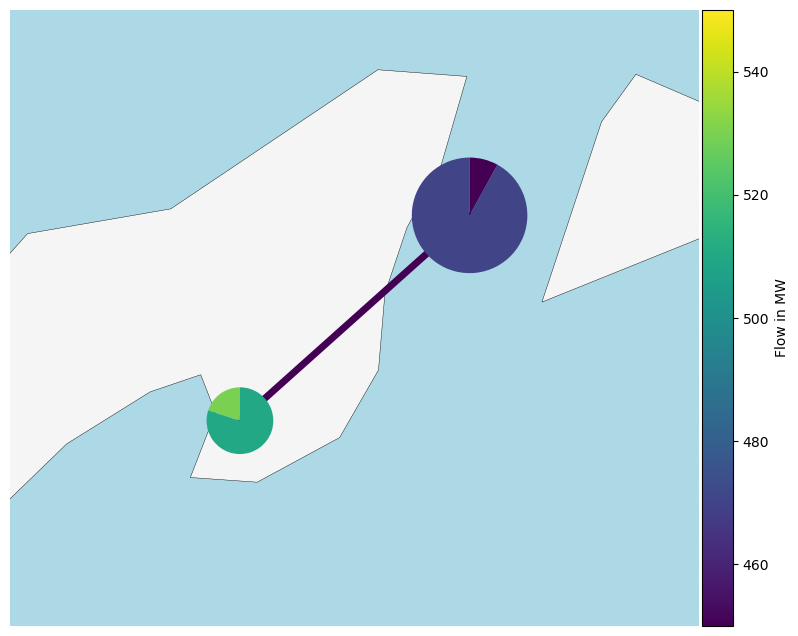

(<matplotlib.colorbar.Colorbar at 0x242f69d1210>, None)

In [305]:
plot_graphs()

In [301]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plotly_network(network):
    fig = make_subplots(rows=1, cols=1, subplot_titles=["Network Topology"])

    # Plot Buses
    bus_trace = go.Scattergeo(
        lat=network.buses["y"],
        lon=network.buses["x"],
        mode="markers",
        marker=dict(
            size=10,
            color="red",
            line=dict(width=2, color="black")
        ),
        text=network.buses.index
    )

    # Plot Lines
    for _, line in network.lines.iterrows():
        bus0 = network.buses.loc[line["bus0"], ["x", "y"]]
        bus1 = network.buses.loc[line["bus1"], ["x", "y"]]
        line_trace = go.Scattergeo(
            lat=[bus0["y"], bus1["y"]],
            lon=[bus0["x"], bus1["x"]],
            mode="lines",
            line=dict(width=2, color="blue"),
            hoverinfo="none"
        )
        fig.add_trace(line_trace)

    fig.add_trace(bus_trace)

    fig.update_layout(
        geo=dict(
            projection_scale=300,
            center=dict(lat=network.buses["y"].mean(), lon=network.buses["x"].mean()),
            visible=False
        ),
        showlegend=False
    )

    fig.show()

# Assuming you have a network object
plotly_network(network)